In [2]:
import sys
import os
import sympy as sp
import numpy as np

# Add the correct path to the P2 folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from data_handler import add_column_to_file

_**Messungen am Mikroskop**_

**364.a:** Messung von $\gamma_{obj}$

In [3]:
# x10 Objektiv: B_z=10mm, G=0.9mm
var_names=[Bz, G]=sp.symbols('Bz G')
formula=Bz/G
gaussian_error_propagation(formula, ((Bz,10,1),(G,0.9,0.05)))

Formel: Bz/G
Werte: ((Bz, 10, 1), (G, 0.9, 0.05)) 

Formelwert: 11.1111111111111

Fehlerformel: sqrt((del_Bz/G)**2 + (-Bz*del_G/G**2)**2)
Fehler: 1.27106544950457 
Ergebnis: 11.1111±1.2711


In [4]:
# x20 Objektiv: B_z=10mm, G=0.5mm
var_names=[Bz, G]=sp.symbols('Bz G')
formula=Bz/G
gaussian_error_propagation(formula, ((Bz,10,1),(G,0.5,0.05)))

Formel: Bz/G
Werte: ((Bz, 10, 1), (G, 0.5, 0.05)) 

Formelwert: 20.0000000000000

Fehlerformel: sqrt((del_Bz/G)**2 + (-Bz*del_G/G**2)**2)
Fehler: 2.82842712474619 
Ergebnis: 20.0000000000000±2.8284


Messung des Gesamtabbildungsmaßstabs $\gamma_M$

In [5]:
# x10 Okular; x10 Objektiv: B=10mm, G=0.1mm
var_names=[B, G]=sp.symbols('Bz G')
formula=B/G
gaussian_error_propagation(formula, ((Bz,10,1),(G,0.1,0.05)))

Formel: Bz/G
Werte: ((Bz, 10, 1), (G, 0.1, 0.05)) 

Formelwert: 100.000000000000

Fehlerformel: sqrt((del_Bz/G)**2 + (-Bz*del_G/G**2)**2)
Fehler: 50.9901951359278 
Ergebnis: 100.000000000000±50.9902


In [6]:
# x5 Okular; x20 Objektiv: B=9mm, G=0.1mm
var_names=[B, G]=sp.symbols('Bz G')
formula=B/G
gaussian_error_propagation(formula, ((Bz,9,1),(G,0.1,0.05)))

Formel: Bz/G
Werte: ((Bz, 9, 1), (G, 0.1, 0.05)) 

Formelwert: 90.0000000000000

Fehlerformel: sqrt((del_Bz/G)**2 + (-Bz*del_G/G**2)**2)
Fehler: 46.0977222864644 
Ergebnis: 90.0000000000000±46.0977


Berechnung der Vergrößerung $V_{oku}$

In [7]:
# x10 Okular; x10 Objektiv: gamma_M=100; gamma_obj=11.1
var_names=[gamma_M, gamma_obj, s_0, b]=sp.symbols('gamma_M gamma_obj s_0 b')
formula=gamma_M*s_0/(gamma_obj*b)
gaussian_error_propagation(formula, ((gamma_M,100,60),(gamma_obj,11.1,1.3),(s_0,25,0),(b,21.5,0.5)))

Formel: gamma_M*s_0/(b*gamma_obj)
Werte: ((gamma_M, 100, 60), (gamma_obj, 11.1, 1.3), (s_0, 25, 0), (b, 21.5, 0.5)) 

Formelwert: 10.4755918709407

Fehlerformel: sqrt((del_gamma_M*s_0/(b*gamma_obj))**2 + (-del_gamma_obj*gamma_M*s_0/(b*gamma_obj**2))**2 + (-del_b*gamma_M*s_0/(b**2*gamma_obj))**2)
Fehler: 6.40860762524179 
Ergebnis: 10.4756±6.4086


In [8]:
# 5 Okular; 20 Objektiv: gamma_M=90; gamma_obj=20
var_names=[gamma_M, gamma_obj, s_0, b]=sp.symbols('gamma_M gamma_obj s_0 b')
formula=gamma_M*s_0/(gamma_obj*b)
gaussian_error_propagation(formula, ((gamma_M,90,50),(gamma_obj,20.0,2.9),(s_0,25,0),(b,21.5,0.5)))

Formel: gamma_M*s_0/(b*gamma_obj)
Werte: ((gamma_M, 90, 50), (gamma_obj, 20.0, 2.9), (s_0, 25, 0), (b, 21.5, 0.5)) 

Formelwert: 5.23255813953489

Fehlerformel: sqrt((del_gamma_M*s_0/(b*gamma_obj))**2 + (-del_gamma_obj*gamma_M*s_0/(b*gamma_obj**2))**2 + (-del_b*gamma_M*s_0/(b**2*gamma_obj))**2)
Fehler: 3.00682208721900 
Ergebnis: 5.2326±3.0068


**364.b:** Brennweite $f$ des x20-Okulars übers Abbe-Verfahren

In [9]:
# f=G*(T2-T1)/(B2-B1)
var_names=[G, dT, B1, B2]=sp.symbols('G dT B1 B2')
formula=G*dT/(B2-B1)
gaussian_error_propagation(formula, ((G,0.1,0),(dT,60,0.1),(B1,9,1),(B2,14,1)))

Formel: G*dT/(-B1 + B2)
Werte: ((G, 0.1, 0), (dT, 60, 0.1), (B1, 9, 1), (B2, 14, 1)) 

Formelwert: 1.20000000000000

Fehlerformel: sqrt((G*del_dT/(-B1 + B2))**2 + (G*dT*del_B1/(-B1 + B2)**2)**2 + (-G*dT*del_B2/(-B1 + B2)**2)**2)
Fehler: 0.339417147474903 
Ergebnis: 1.2000±0.3394


***Messungen am Fernrohr***

**364.c:** Astronomisches Fernrohr mit mind. 6-facher Vergrößerung $V_f=\frac{\frac{B_Z}{f_{oku}}}{\frac{B_Z}{f_{obj}}}=\frac{f_{obj}}{f_{oku}}$ bzw. $V=N/M$

In [11]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,100,0),(M, 13,1)))

Formel: N/M
Werte: ((N, 100, 0), (M, 13, 1)) 

Formelwert: 7.69230769230769

Fehlerformel: sqrt((-N*del_M/M**2)**2)
Fehler: 0.591715976331361 
Ergebnis: 7.6923±0.5917


In [19]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,38,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, 38, 0)) 

Formelwert: 7.89473684210526

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: 7.8947±0


Am Rand des sichtfeldes tritt starke sphärische Aberation auf, die mit der Vergrößerung zunimmt.

**364.d:** Andere Okularlinsen

$f_{oku}=50,2 \, mm$

In [20]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,100,0),(M, 16,1)))

Formel: N/M
Werte: ((N, 100, 0), (M, 16, 1)) 

Formelwert: 6.25000000000000

Fehlerformel: sqrt((-N*del_M/M**2)**2)
Fehler: 0.390625000000000 
Ergebnis: 6.2500±0.3906


In [21]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,50.2,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, 50.2, 0)) 

Formelwert: 5.97609561752988

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: 5.9761±0


$f_{oku}=12,7 \, mm$

In [24]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,100,0),(M, 6,2)))

Formel: N/M
Werte: ((N, 100, 0), (M, 6, 2)) 

Formelwert: 16.6666666666667

Fehlerformel: sqrt((-N*del_M/M**2)**2)
Fehler: 5.55555555555556 
Ergebnis: 16.6667±5.5556


In [23]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,12.7,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, 12.7, 0)) 

Formelwert: 23.6220472440945

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: 23.6220±0


**364.e:** Terrestrisches Fernrohr mit $f_{oku}=38 \, mm$ und $f_{Dreh}=12.7 \, mm$

In [29]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,21,1),(M,3,0.5)))

Formel: N/M
Werte: ((N, 21, 1), (M, 3, 0.5)) 

Formelwert: 7.00000000000000

Fehlerformel: sqrt((del_N/M)**2 + (-N*del_M/M**2)**2)
Fehler: 1.21335164821342 
Ergebnis: 7.00000000000000±1.2134


**364.f:** Gallileisches Fernrohr mit $f_{oku}=-12.5 \, mm$

In [30]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,70,10),(M, 5,1)))

Formel: N/M
Werte: ((N, 70, 10), (M, 5, 1)) 

Formelwert: 14.0000000000000

Fehlerformel: sqrt((del_N/M)**2 + (-N*del_M/M**2)**2)
Fehler: 3.44093010681705 
Ergebnis: 14.0000000000000±3.4409


In [33]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,-12.5,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, -12.5, 0)) 

Formelwert: -24.0000000000000

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: -24.0000000000000±0


***Messung des Auflösungsvermögens von Linsen***

**364.f:** Bestätigung des kleinsten auflösbaren Sehwinkels nach dem Rayleigh-Kriterium

In [40]:
# Die Skalenmitte (also 90°) waren bei uns 106.5 skt. Dementsprechend müssen zunächst Skalenteile in Grad bzw. danach in Sehwinkel umgerechnet werden.
mid=106.5
var_names=[DB, xl, E, DS]=sp.symbols('DB xl E DS')
formula_list=[
    DB,
	2*(90*(mid-xl)/mid)
    ]
evaluate_gaussian_error('g_mess.csv',formulas=formula_list, variables=var_names, result_length=5,result_names=['D_B [mm]','alpha [°]'])

sqrt((del_DB)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (-1.69014084507042*del_xl)**2 + (0)**2 + (0)**2)
Zeile 1: [3.0, 0.0, 0.0, 1.69014]
Zeile 2: [2.0, 0.0, 20.28169, 1.69014]
Zeile 3: [1.0, 0.0, 36.33803, 1.69014]
Zeile 4: [0.6, 0.0, 76.05634, 1.69014]
Zeile 5: [0.3, 0.0, 180.0, 1.69014]
Auswertung abgeschlossen. Ergebnisse wurden in 'g_mess_results.csv' gespeichert.


In [43]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[DB, alpha]=sp.symbols('DB alpha')
formula_list=[
    1/DB,
	alpha
    ]
evaluate_gaussian_error('g_mess_results.csv',formulas=formula_list, variables=var_names, result_length=5,result_names=['1/D_B [1/mm]','alpha [°]'], output_file_suffix='plot')

sqrt((-del_DB/DB**2)**2 + (0)**2)
sqrt((0)**2 + (del_alpha)**2)
Zeile 1: [0.33333, 0.0, 0.0, 1.69014]
Zeile 2: [0.5, 0.0, 20.28169, 1.69014]
Zeile 3: [1.0, 0.0, 36.33803, 1.69014]
Zeile 4: [1.66667, 0.0, 76.05634, 1.69014]
Zeile 5: [3.33333, 0.0, 180.0, 1.69014]
Auswertung abgeschlossen. Ergebnisse wurden in 'g_mess_results_plot.csv' gespeichert.


58.5195567382205 58.519556738220494
Fit-Ergebnisse für 1:
Schwerpunkt: (1.36666600 ± 0.00000010, 62.5 ± 1.7)
Steigung: 58.5 ± 0.7
Y-Achsenabschnitt: -17.4 ± 1.2



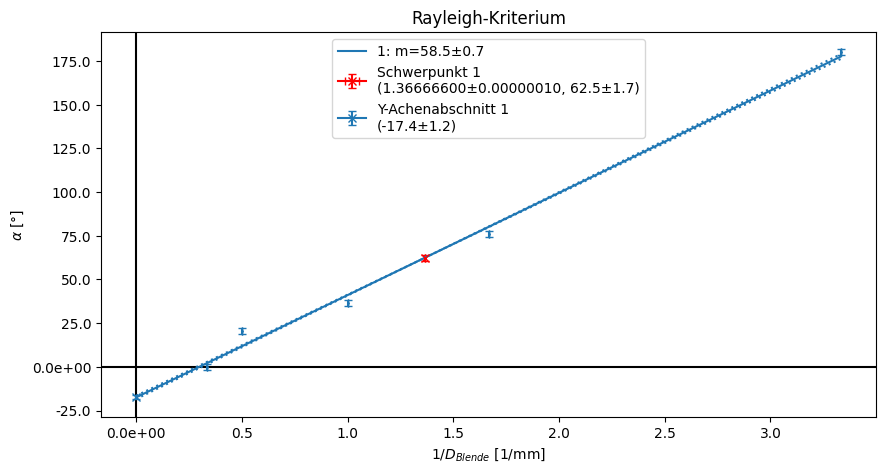

In [45]:
geraden_fit('g_mess_results_plot.csv', title='Rayleigh-Kriterium', x_label=r'$1/D_{Blende}$ [1/mm]', y_label=r'$\alpha$ [°]',
			save=False, linear_fit=True, focus_point=True, plot_y_inter=True)